<a href="https://colab.research.google.com/github/els285/Aachen_Intro2NN/blob/main/1_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torch Tensors

Intro PyTorch Tensor tutorial: [https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html]([https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html])

In-depth PyTorch Tensor tutorial: [https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)

We talk about and use tensors all the time in machine learning. Tensors are really **multidimensional arrays**

You might think of a tensor like a matrix or the same thing as a tensor from mathematics (multiliner algebra, liek you would find if you have studied general relativity for example); but it's important to keep in mind that matrices and mathemaetical tensors have specific mathematical definitions and properties. Machine learning tensors are really jsut arrays...

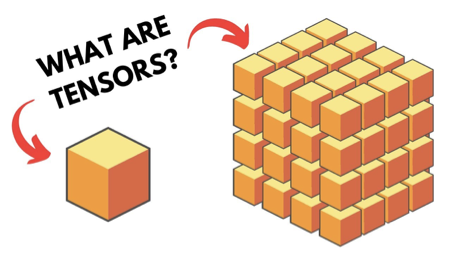

## Testing the Torch Input

In [1]:
import torch

In [2]:
torch.__version__

'2.6.0+cu124'

If this throws an error, try restarting the notebook, or try the following

In [ ]:
!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch
!pip list # to see if torch is now available under the pip installations

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.5.2
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.23
albumentations                        2.0.5
ale-py                                0.10.2
altair                                5.5.0
annotated-types                       0.7.0
anyio                                 4.9.0
argon2-cffi                           23.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.1
arviz                                 0.21.0
astropy                               7.0.1
astropy-iers-data                     0.2025.4.14.0.37.22
astunparse                            1.6.3
atpublic                              5

## Tensor Basics

In [ ]:
import torch
T = torch.tensor([[1,2,3],[4,5,6]]) # Creates a 2x3 tensor from a nested Python list
print(T)

tensor([[1, 2, 3],
        [4, 5, 6]])


It's important to understand the shape of a given tensor

In [ ]:
T.shape

torch.Size([2, 3])

as well as the numerical type

In [ ]:
T.dtype

torch.int64

We can create tensors of specific `dtype`:

In [ ]:
T2 = torch.tensor([[7,8],[9,10]],dtype=torch.float32)

The main selling point of torch tensors is that they are designed to run on GPUs, so let's understand GPU-compatibility right away

In [ ]:
# Define device as the device that PyTorch will use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
T2.to(device)

tensor([[ 7.,  8.],
        [ 9., 10.]])

Check whether the tensor is stored on the GPU

In [ ]:
print(T2.is_cuda)
print(T.device)

False
cpu


We can create tensors filled with specific values e.g. zeros, ones, or random numbers

In [ ]:
zero_tensor = torch.zeros(3, 3)
one_tensor = torch.ones(2, 2)
random_tensor = torch.rand(2, 3)


## Tensor Arithmetic

Tensors follow basic arithmetic

In [ ]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])

In [ ]:
# Operations with a scalar
print(tensor1 + 2)
print(tensor1 - 2)
print(tensor1 * 2)
print(tensor1 / 2)

tensor([3, 4, 5])
tensor([-1,  0,  1])
tensor([2, 4, 6])
tensor([0.5000, 1.0000, 1.5000])


In [ ]:
# Addition
print(tensor1 + tensor2)
# Subtraction
print(tensor1 - tensor2)
# Element-wise multiplication
print(tensor1 * tensor2)
# Element-wise division
print(tensor1 / tensor2)
# Element-wise exponentiation
print(tensor2**tensor1)

tensor([5, 7, 9])
tensor([-3, -3, -3])
tensor([ 4, 10, 18])
tensor([0.2500, 0.4000, 0.5000])
tensor([  4,  25, 216])


Note that operations are applied element-wise e.g. multiplication is not like vector or matrix multiplication

**Very important rule**: tensor operations only work if the dimensionality of the tensors is compatible!

In [ ]:
tensor3 = torch.tensor([1, 2, 3])
tensor4 = torch.tensor([4, 5, 6, 7])

tensor3+tensor4

RuntimeError: The size of tensor a (3) must match the size of tensor b (4) at non-singleton dimension 0

More advanced mathematical operations are applied element

In [ ]:
print(torch.sqrt(tensor1))
print(torch.log(tensor1))
print(torch.cos(tensor1))


tensor([1.0000, 1.4142, 1.7321])
tensor([0.0000, 0.6931, 1.0986])
tensor([ 0.5403, -0.4161, -0.9900])


## Task 1
Let's consider 100 projecticles fired with random initial velocities and random initial angles

* Create a tensor called `u0` of shape Nx1 with random values between 0 and 10
* Create a tensor `angle` of same shape with random values between 0 and pi/2.
* Compute the vertical component of initial velocity of each projectile ($ v_0^y = u_0 \sin(\theta) $)
* Compute the vertical displacement of each projectile after one second ($ y = v_0^yt + \frac{1}{2}gt^2$)

![image.png](
  
)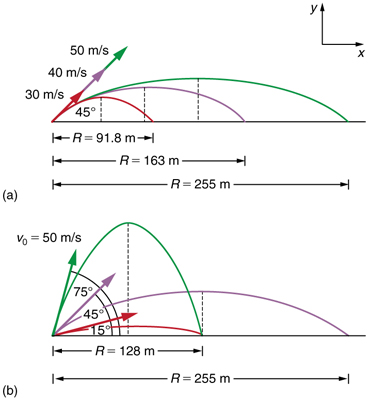

In [ ]:
# @title Task 1A solution
# Initialise 100 random velocities
u0 = 10*torch.rand(100)

# Initialise 100 random angles
angle = torch.pi/2*torch.rand(100)

# Compute the vertical component of initial velocity
vertical = u0*torch.sin(angle) - 9.8*torch.arange(0,100)

# Compute the vertical displacement
vert_displacement = u0*torch.sin(angle) - 9.8*0.5*torch.arange(100)**2

print(vert_displacement)

tensor([ 2.0426e+00, -4.5989e+00, -1.9463e+01, -4.3481e+01, -7.2819e+01,
        -1.2246e+02, -1.7326e+02, -2.3891e+02, -3.0497e+02, -3.9042e+02,
        -4.8937e+02, -5.8363e+02, -7.0509e+02, -8.2341e+02, -9.5893e+02,
        -1.0992e+03, -1.2541e+03, -1.4159e+03, -1.5859e+03, -1.7634e+03,
        -1.9567e+03, -2.1565e+03, -2.3660e+03, -2.5872e+03, -2.8138e+03,
        -3.0549e+03, -3.3121e+03, -3.5711e+03, -3.8320e+03, -4.1140e+03,
        -4.4094e+03, -4.7037e+03, -5.0110e+03, -5.3351e+03, -5.6600e+03,
        -5.9972e+03, -6.3451e+03, -6.7067e+03, -7.0707e+03, -7.4498e+03,
        -7.8388e+03, -8.2347e+03, -8.6358e+03, -9.0587e+03, -9.4815e+03,
        -9.9215e+03, -1.0366e+04, -1.0816e+04, -1.1284e+04, -1.1763e+04,
        -1.2246e+04, -1.2742e+04, -1.3249e+04, -1.3764e+04, -1.4288e+04,
        -1.4822e+04, -1.5360e+04, -1.5920e+04, -1.6479e+04, -1.7056e+04,
        -1.7639e+04, -1.8227e+04, -1.8832e+04, -1.9441e+04, -2.0070e+04,
        -2.0696e+04, -2.1337e+04, -2.1993e+04, -2.2

## Combining Tensors

In [ ]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])

The `stack` operation combines tensors along a new dimension

In [ ]:
# Stack vertically (along dim=0)
print(torch.stack((tensor1, tensor2), dim=0))

# Stack horizontally (along dim=1)
print(torch.stack((tensor1, tensor2), dim=1))


tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


The `concatenate` operation combines tensors along an existing dimension

In [ ]:
print(torch.cat((tensor1, tensor2), dim=0))

tensor([1, 2, 3, 4, 5, 6])


Some reshaping operations for changing the shape of tensors

In [ ]:
print(tensor1.reshape(-1,1))
print(tensor1.reshape(-1,1).shape)


tensor([[1],
        [2],
        [3]])
torch.Size([3, 1])


## Task 2

Let's make some pretend Large Hadron Collider data

* Create a tensors corresponding to the $x$ component of momentum of 10,000 different particles. The mean should be 0 and the standard deviation 100 (the units here are GeV but this is not important)
* Create similar tensors for the $y$ and $z$ momenta components
* Compute a tensor for the energy using the relation $E^2 = p_x^2 + p_y^2 + p_z^2 + m^2$ where we will assume the mass to be zero.
* Combine the four tensors into one tensor of shape (10000,4)
* Filter the array: return a sub-array containing only particles (rows) which have $\sqrt{p_x^2 + p_y^2} > 50$
* Find the largest $p_z$ value in the array
* Find the index of particles with the largest and the smallest energy
* Normlise each column of such that the values lie between -1 and 1

### Hints

In [ ]:
# Sampling from a normal distribution with standard deviation 100 GeV
n_events = 10000
std_dev = 100
px = std_dev*torch.randn(n_events)

### Solutions

In [ ]:
# @title Creating the momenta and energy tensors
# Number of events
n_events = 10000

# Rest mass of the particle (assumed to be 1.0 for this example)
m = 0.0

# Randomly generate 3-momentum components (px, py, pz)
std_dev = 100
px = std_dev*torch.randn(n_events)
py = std_dev*torch.randn(n_events)
pz = std_dev*torch.randn(n_events)

# Calculate the energy E using the relativistic energy-momentum relation
E = torch.sqrt(px**2 + py**2 + pz**2 + m**2)

# Stack the 4-momentum components into a tensor of shape (n_events, 4)
momentum_tensor = torch.stack((px, py, pz, E), dim=1)

print(momentum_tensor)
print(momentum_tensor.shape)  # Should be (10000, 4)

In [ ]:
# @title Filtering


# Apply a mask to filter out events with momentum magnitude greater than 50
mask = torch.sqrt((momentum_tensor[:,0]**2) + (momentum_tensor[:,1]**2))>50
filtered_momentum_tensor = momentum_tensor[mask]

# Print the results
print(filtered_momentum_tensor.shape)
print(filtered_momentum_tensor)


torch.Size([10000, 4])
tensor([[ 153.9135,  -41.7154, -148.2034,  217.7011],
        [  67.0513,   20.9866,    9.5341,   70.9029],
        [ -43.3652,  137.0096,  -13.1622,  144.3101],
        ...,
        [ -63.4323,  -20.0519,   53.4045,   85.3099],
        [ -55.5539, -191.4119, -200.4531,  282.6768],
        [-139.6506,  -32.8649,  100.3947,  175.1042]])
torch.Size([8787, 4])
tensor([[ 153.9135,  -41.7154, -148.2034,  217.7011],
        [  67.0513,   20.9866,    9.5341,   70.9029],
        [ -43.3652,  137.0096,  -13.1622,  144.3101],
        ...,
        [ -63.4323,  -20.0519,   53.4045,   85.3099],
        [ -55.5539, -191.4119, -200.4531,  282.6768],
        [-139.6506,  -32.8649,  100.3947,  175.1042]])
tensor(374.7623)
tensor(5721)
tensor(5031)
tensor([[ 0.4661, -0.0501, -0.4526, -0.1549],
        [ 0.2309,  0.1024, -0.0145, -0.8988],
        [-0.0681,  0.3846, -0.0775, -0.5268],
        ...,
        [-0.1225,  0.0026,  0.1074, -0.8258],
        [-0.1011, -0.4143, -0.5977,  0.

In [ ]:
# @title Indexing
# Use torch.max to find the maximum value of the z-component of the momentum
print(torch.max(filtered_momentum_tensor[:,2]))

# Use torch.arg and torch.argmin to find the index of the maximum and minimum values of the energy
print(torch.argmax(filtered_momentum_tensor[:,3]))
print(torch.argmin(filtered_momentum_tensor[:,3]))



tensor([ 153.9135,   67.0513,  -43.3652,  ...,  -63.4323,  -55.5539,
        -139.6506])

In [ ]:
# @title Normalising data
# Normalise each column's values to lie between -1 and 1
normalised_momentum_tensor = 2*(filtered_momentum_tensor - torch.min(filtered_momentum_tensor, dim=0).values) / (torch.max(filtered_momentum_tensor, dim=0).values - torch.min(filtered_momentum_tensor, dim=0).values) - 1
print(normalised_momentum_tensor)

tensor([[ 0.4661, -0.0501, -0.4526, -0.1549],
        [ 0.2309,  0.1024, -0.0145, -0.8988],
        [-0.0681,  0.3846, -0.0775, -0.5268],
        ...,
        [-0.1225,  0.0026,  0.1074, -0.8258],
        [-0.1011, -0.4143, -0.5977,  0.1744],
        [-0.3289, -0.0286,  0.2379, -0.3707]])
